In [1]:
#We will be using a Deep Learning Model because we have 5 Classifications (1-5 star yelp ratings) and whether those correlate to a 1-3 Michelin Star resturant.

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

#  Import and read the ca_michelin_yelp_data.csv.
michelin_star_df = pd.read_csv("combine_data.csv") 
michelin_star_df.head()

,name,rating,review_count,price,latitude,longitude,stars,michelin,latBin,lonBin
0,Chez TJ,4.0,735,4,37.394680,-122.08044,1,1,37.2,-122.2
1,Protégé,4.5,348,4,37.427853,-122.14362,1,1,37.4,-122.2
2,Madera,3.5,886,3,37.420140,-122.21151,1,1,37.4,-122.4
3,The Village Pub,4.0,1088,4,37.428970,-122.25178,1,1,37.4,-122.4
4,Plumed Horse,4.0,1244,4,37.256480,-122.03537,1,1,37.2,-122.2


In [2]:
print(michelin_star_df.dtypes)

name             object
rating          float64
review_count      int64
price             int64
latitude        float64
longitude       float64
stars             int64
michelin          int64
latBin          float64
lonBin          float64
dtype: object


In [3]:
# Determine the number of unique values in each column.
michelin_star_df.nunique()

name            6588
rating             9
review_count    1952
price              4
latitude        6892
longitude       6873
stars              4
michelin           2
latBin            21
lonBin            21
dtype: int64

In [4]:
# Look at Yelp Star Review value counts for binning
yelp_counts = michelin_star_df['review_count'].sort_values(ascending=True)
yelp_counts

2713        1
3936        1
3007        1
5095        1
5693        1
        ...  
1201    11411
616     13373
4182    14554
5867    14798
3229    17070
Name: review_count, Length: 7111, dtype: int64

<AxesSubplot:ylabel='Density'>

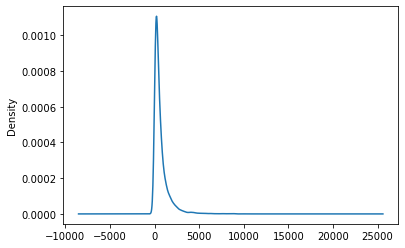

In [5]:
# Visualize the value counts of review_counts
yelp_counts.plot.density()

In [6]:
# Look at STARS value counts for binning
michelinstars_counts = michelin_star_df.stars.value_counts()
michelinstars_counts


0    6932
1     137
2      30
3      12
Name: stars, dtype: int64

<AxesSubplot:ylabel='Density'>

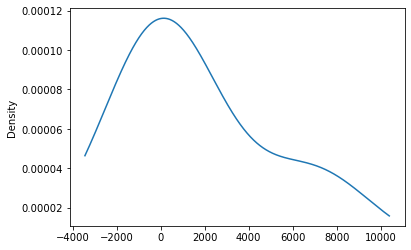

In [7]:
# Visualize the value counts of MICHELINSTARS
michelinstars_counts.plot.density()

In [8]:
# Generate our categorical variable lists
michelin_cat = michelin_star_df.dtypes[michelin_star_df.dtypes == "object"].index.tolist()

In [9]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(michelin_star_df[michelin_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(michelin_cat)
encode_df.head()

/Users/erinoneil/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,name_& Waffles,name_&pizza - Columbia Heights,name_&pizza - Dupont,name_&pizza - E Street,name_&pizza - K Street,name_10 Thomas Restaurant,name_100s Seafood Grill Buffet,name_101 Asian Kitchen,name_12 Chairs,name_12 Chairs Cafe,...,name_opa cafe,name_pomelo on Judah,name_sweetgreen Capitol Hill,name_the Albert,name_the C restaurant + bar,name_wagamama - midtown,name_wonderful,name_Ñoño’s Taqueria,name_Ørkenoy,name_眞 Jin Cook - Authentic Korean Soul Food
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Merge one-hot encoded features and drop the originals
michelin_star_df = michelin_star_df.merge(encode_df,left_index=True, right_index=True)
michelin_star_df = michelin_star_df.drop(michelin_cat,1)
michelin_star_df.head()

/Users/erinoneil/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,rating,review_count,price,latitude,longitude,stars,michelin,latBin,lonBin,name_& Waffles,...,name_opa cafe,name_pomelo on Judah,name_sweetgreen Capitol Hill,name_the Albert,name_the C restaurant + bar,name_wagamama - midtown,name_wonderful,name_Ñoño’s Taqueria,name_Ørkenoy,name_眞 Jin Cook - Authentic Korean Soul Food
0,4.0,735,4,37.394680,-122.08044,1,1,37.2,-122.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.5,348,4,37.427853,-122.14362,1,1,37.4,-122.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.5,886,3,37.420140,-122.21151,1,1,37.4,-122.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,1088,4,37.428970,-122.25178,1,1,37.4,-122.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,1244,4,37.256480,-122.03537,1,1,37.2,-122.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Split our preprocessed data into our features and target arrays
y = michelin_star_df['stars']

X = michelin_star_df.drop(columns='michelin')

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [12]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Random Forest

In [14]:
# Create a random forest classifier.
#rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
##rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
#y_pred = rf_model.predict(X_test_scaled)
#print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

## Logistic Regression

In [16]:
# ***Find P-value for columns/which has more impact? 

# Define the logistic regression model
#log_classifier = LogisticRegression(solver="lbfgs",max_iter=400)

# Train the model
#log_classifier.fit(X_train,y_train)

# Evaluate the model
#y_pred = log_classifier.predict(X_test)
#print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

## Deep Learning Model

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 50
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                329850    
                                                                 
 dense_1 (Dense)             (None, 30)                1530      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 331,411
Trainable params: 331,411
Non-trainable params: 0
_________________________________________________________________


2022-03-31 19:44:36.644146: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [19]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}hdf5"

In [20]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
167/167 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.9692
Epoch 2/100
167/167 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.9749
Epoch 3/100
167/167 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.9749
Epoch 4/100
167/167 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.9749
Epoch 5/100
157/167 [===========================>..] - ETA: 0s - loss: nan - accuracy: 0.9751
Epoch 5: saving model to checkpoints/weights.05hdf5
167/167 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.9749
Epoch 6/100
167/167 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.9749
Epoch 7/100
167/167 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.9749
Epoch 8/100
167/167 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.9749
Epoch 9/100
167/167 [==============================] - 1s 5ms/step - loss: nan - a

167/167 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.9749
Epoch 66/100
167/167 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.9749
Epoch 67/100
167/167 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.9749
Epoch 68/100
167/167 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.9749
Epoch 69/100
167/167 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.9749
Epoch 70/100
165/167 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.9750
Epoch 70: saving model to checkpoints/weights.70hdf5
167/167 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.9749
Epoch 71/100
167/167 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.9749
Epoch 72/100
167/167 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.9749
Epoch 73/100
167/167 [==============================] - 1s 5ms/step - loss: nan - accu

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

56/56 - 0s - loss: nan - accuracy: 0.9747 - 332ms/epoch - 6ms/step
Loss: nan, Accuracy: 0.9746906757354736


<AxesSubplot:>

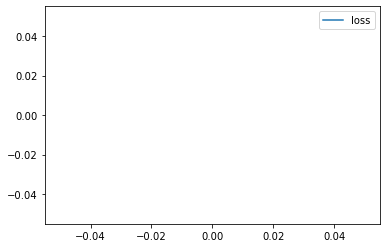

In [22]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

In [23]:
# Guess whether it has 1,2,3 only in the michelin data 
# Take that model and include resturants that dont have michelin stars and predict whether a restaurant will gain in the future. 

<AxesSubplot:>

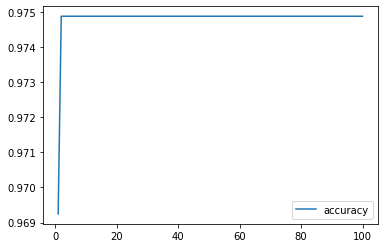

In [24]:
# Plot the accuracy
history_df.plot(y="accuracy")